# Data preparation for final figures
*Collective Compass Project, DJA, 2022-2024*

---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import requests
plt.rcParams.update({'font.size': 10}) # must set in top
plt.rcParams.update({'figure.figsize': (10, 4)}) # must set in top

---
## Download the data

In [2]:
# download a fresh copy of the dataset from the OSF
data_url = 'https://osf.io/f76rb//?action=download'
response = requests.get(data_url)

if response.status_code == 200:
    with open('../data/dat.csv', 'wb') as f:
        f.write(response.content)

In [3]:
df = pd.read_csv('../data/dat.csv')
df_test = df.dropna()

---
## Figure 1

Text(0, 0.5, 'Aantal')

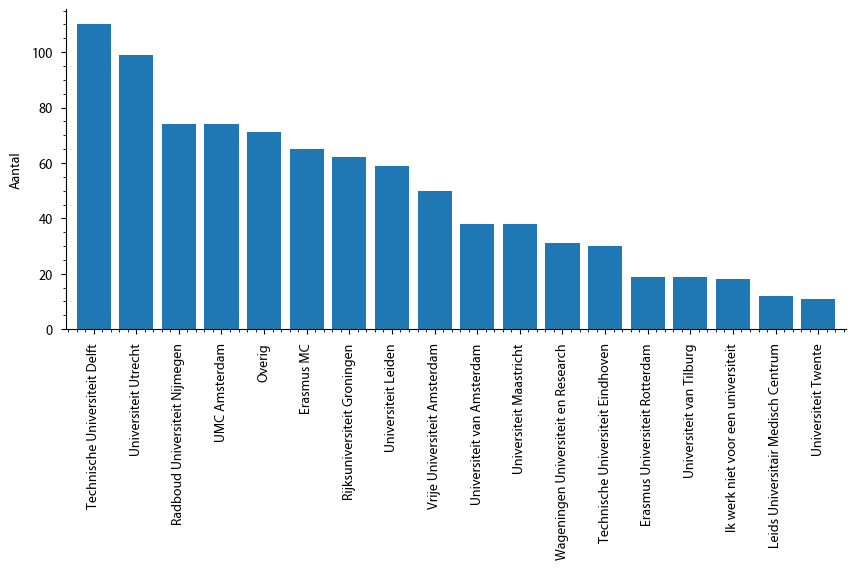

In [4]:
df = df.replace({
    'Academisch Medisch Centrum': 'UMC Amsterdam',
    'Vrije Universiteit medisch centrum': 'UMC Amsterdam'
})

fig1_data = df['institution'].value_counts()
ax = fig1_data.plot.bar(width=0.8);
ax.set_ylabel('Aantal')

In [5]:
fig1_data_eng = fig1_data.copy()
fig1_data_eng = fig1_data_eng.rename({
    'Technische Universiteit Delft': 'Delft University of Technology',
    'Universiteit Utrecht' : 'Utrecht University',
    'Radboud Universiteit Nijmegen': 'Radboud University',
    'Overig': 'Other',
    'Erasmus MC': 'Erasmus Medical Center',
    'Rijksuniversiteit Groningen': 'University of Groningen', 
    'Universiteit Leiden': 'Leiden University',
    'Vrije Universiteit Amsterdam': 'VU Amsterdam',
    'Universiteit van Amsterdam': 'University of Amsterdam',
    'Universiteit Maastricht': 'Maastricht University',
    'Wageningen Universiteit en Research': 'Wageningen University & Research',
    'Technische Universiteit Eindhoven': 'Eindhoven University of Technology',
    'Erasmus Universiteit Rotterdam': 'Erasmus University Rotterdam',
    'Universiteit van Tilburg': 'Tilburg University',
    'Ik werk niet voor een universiteit': 'I do not work in academia',
    'Leids Universitair Medisch Centrum': 'Leiden University Medical Center',
    'Universiteit Twente': 'University of Twente'
})

df_fig1 = pd.DataFrame({'Institution': fig1_data_eng.index, 'Count': fig1_data_eng.values})
df_fig1 = df_fig1.set_index('Institution')
df_fig1

,Count
Institution,
Delft University of Technology,110
Utrecht University,99
Radboud University,74
UMC Amsterdam,74
Other,71
Erasmus Medical Center,65
University of Groningen,62
Leiden University,59
VU Amsterdam,50


In [6]:
df_fig1.to_excel('funding_consultation_final_plots_fig1.xlsx')

In [7]:
df_fig1.sum()

Count    880
dtype: int64

---
## Figure 2

In [8]:
df_vals = df[['discipline', 'sex']].value_counts().unstack('sex')
df_vals = df_vals.rename(columns={'Man': 'male', 'Vrouw': 'female'})
df_vals = df_vals.rename({
    'Beta and medicine': 'Beta / medicine',
    'Economy, business, law': 'Economy / business / law',
    'Humanities and social sciences': 'Humanities / social sciences'
})
df_vals

sex,male,female
discipline,,
Beta / medicine,276,174
Economy / business / law,45,34
Humanities / social sciences,63,118


In [9]:
df_vals.to_excel('funding_consultation_final_plots_fig2.xlsx')

Text(22.99999999999998, 0.5, 'Count')

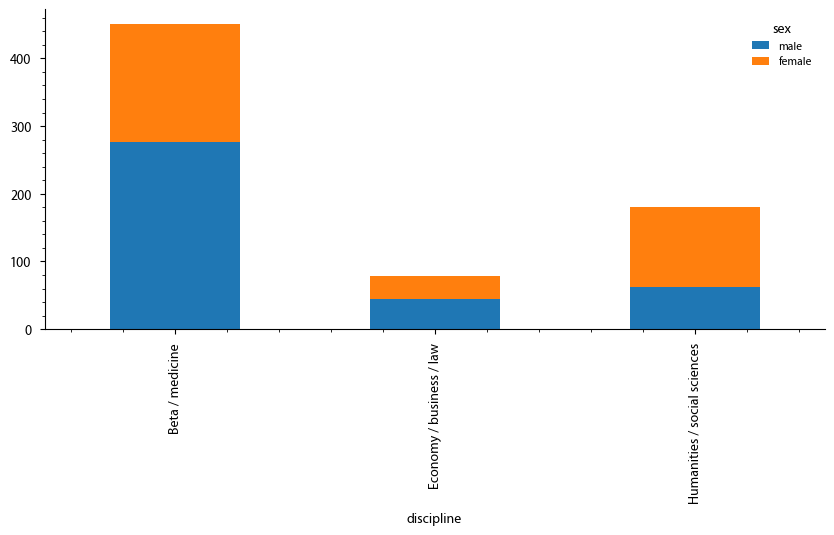

In [10]:
df_vals.plot.bar(stacked=True);
ax.set_ylabel('Count')

---
## Figure 3

In [11]:
df_vals = df[['pos9', 'sex']].value_counts()
df_vals = df_vals.unstack('sex')
df_vals = df_vals.rename(columns={'Man': 'male', 'Vrouw': 'female'})
df_vals = df_vals.rename_axis(index=["appointment"])
df_vals = df_vals.rename({
    'Anders': 'Other',
    'Assistant prof/UD (temporary)': 'Assistant professor (no tenure)',
    'Assistant prof/UD (tenured)': 'Assistant professor (tenured)',
    'Associate prof/UHD': 'Associate professor',
    #'PhD': ,
    #'Postdoc':,
    'Prof / Hoogleraar': 'Full professor',
    'Student/Onderzoeksassistent/junior onderzoeker': 'Junior researcher'
})
df_vals.to_excel('funding_consultation_final_plots_fig3.xlsx')

Text(0, 0.5, 'Count')

<Figure size 1000x400 with 0 Axes>

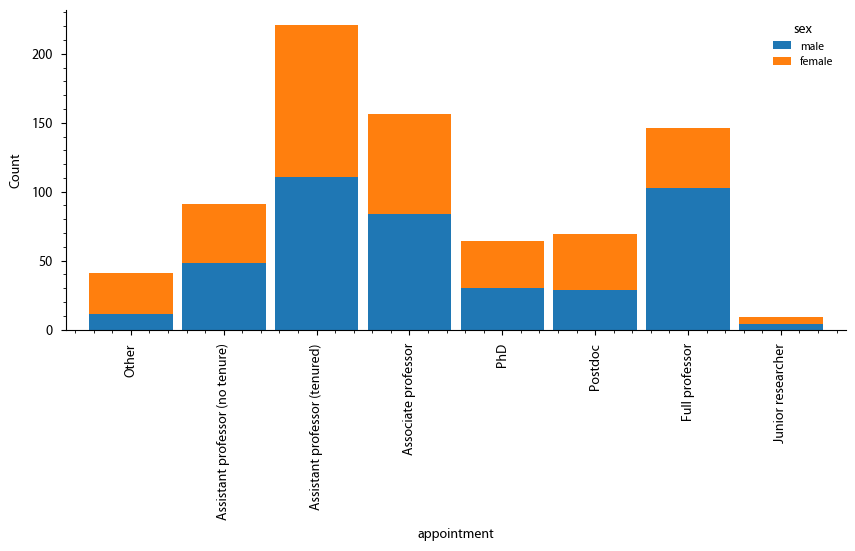

In [12]:
plt.figure()
ax = df_vals.plot.bar(stacked=True, width=0.9);
ax.set_ylabel('Count')

# Figure 3b: career stage and experience

In [13]:
df_vals = df[['pos5', 'body_nwo', 'body_university', 'body_foreign', 'body_award', 'body_none']]
df_vals = df_vals.groupby('pos5').sum()
df_vals

,body_nwo,body_university,body_foreign,body_award,body_none
pos5,,,,,
"Assistant, associate (permanent)",119,64,115,58,73
Assistant/associate prof/UD (temporary contract),22,11,14,5,26
Hoogleraar/professor,77,57,59,42,4
Other,52,33,33,23,31
Student-PhD-Postdoc-OA = ECR,9,3,5,4,95


In [14]:
#df_vals = df_vals.unstack('pos5')

#df_vals = df_vals.rename(columns={'Man': 'male', 'Vrouw': 'female'})
#df_vals = df_vals.rename_axis(index=["appointment"])
df_vals = df_vals.rename(columns={
    'body_nwo': 'NWO',
    'body_university': 'university',
    'body_foreign': 'foreign',
    'body_award': 'award committee',
    'body_none': 'never been in one'
})

df_vals = df_vals.rename({
    'Anders': 'Other',
    'Assistant/associate prof/UD (temporary contract)': 'Assistant/associate professor (no tenure)',
    'Assistant, associate (permanent)': 'Assistant/associate professor (tenured)',
    'Associate prof/UHD': 'Associate professor',
    #'PhD': ,
    #'Postdoc':,
    'Hoogleraar/professor': 'Full professor',
    'Student-PhD-Postdoc-OA = ECR': 'Early career scientist'
})
df_vals.to_excel('funding_consultation_final_plots_fig_new.xlsx')

<Figure size 1000x400 with 0 Axes>

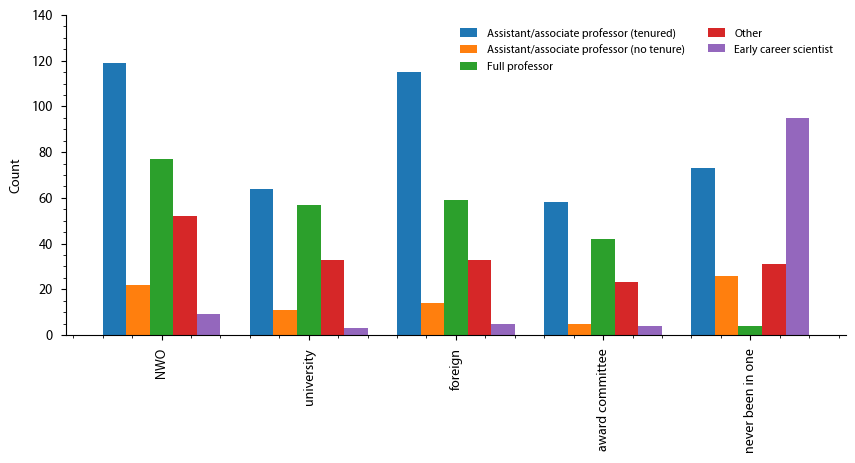

In [15]:
plt.figure()
ax = df_vals.transpose().plot.bar(stacked=False, width=0.8);
ax.set_ylabel('Count')
ax.set_ylim(0, 140)
ax.legend(ncol=2, loc='upper right')

# Risk spreading career stage

In [16]:
df_vals = df[['pos5', 'award_bandwagon']].value_counts().astype(float)
df_vals = df_vals.unstack('award_bandwagon')
df_vals = df_vals.rename({
    'Anders': 'Other',
    'Assistant/associate prof/UD (temporary contract)': 'Assistant/associate professor (no tenure)',
    'Assistant, associate (permanent)': 'Assistant/associate professor (tenured)',
    'Associate prof/UHD': 'Associate professor',
    #'PhD': ,
    #'Postdoc':,
    'Hoogleraar/professor': 'Full professor',
    'Student-PhD-Postdoc-OA = ECR': 'Early career scientist'
})

df_vals.to_excel('funding_consultation_final_plots_fig_new.xlsx')
df_vals['score'] = (df_vals.values[:, 0] + 2*df_vals.values[:, 1] + 3*df_vals.values[:, 2] + 4*df_vals.values[:, 3] + 5*df_vals.values[:, 4]) / df_vals.values.sum(axis=1)
df_vals.values[:, :-1]

df_vals['score_std'] = ((
      df_vals.values[:, 0] * (1. - df_vals.values[:, -1])**2 
    + df_vals.values[:, 1] * (2. - df_vals.values[:, -1])**2
    + df_vals.values[:, 2] * (3. - df_vals.values[:, -1])**2
    + df_vals.values[:, 3] * (4. - df_vals.values[:, -1])**2
    + df_vals.values[:, 4] * (5. - df_vals.values[:, -1])**2) / df_vals.values[:,0:5].sum(axis=1))**.5

df_vals

award_bandwagon,1.0,2.0,3.0,4.0,5.0,score,score_std
pos5,,,,,,,
Assistant/associate professor (tenured),13.0,46.0,50.0,147.0,132.0,3.873711,1.108556
Assistant/associate professor (no tenure),2.0,6.0,11.0,50.0,33.0,4.039216,0.917387
Full professor,3.0,11.0,17.0,38.0,21.0,3.700000,1.058825
Other,2.0,5.0,23.0,45.0,32.0,3.934579,0.929989
Early career scientist,8.0,13.0,40.0,48.0,40.0,3.664430,1.120946


Text(0.5, 0, 'Career stage')

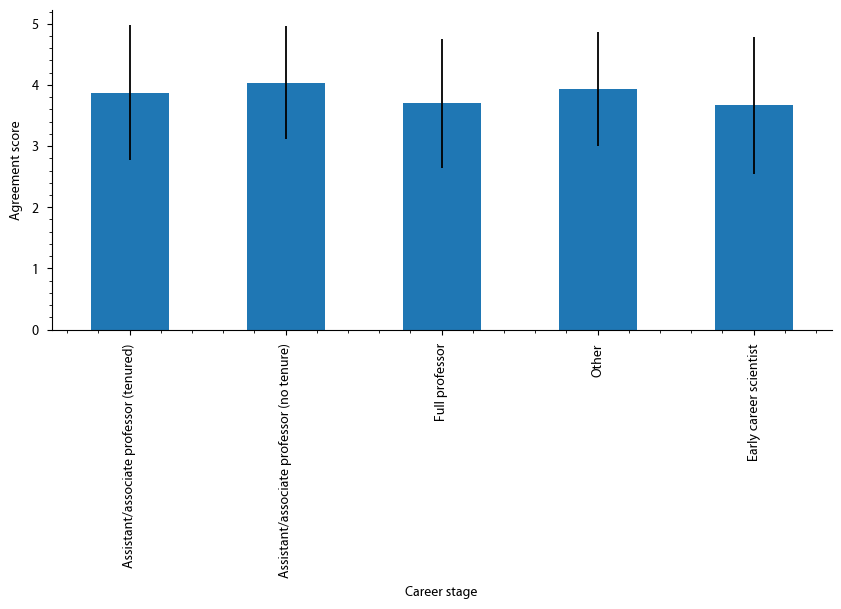

In [17]:
plt.figure()
ax = df_vals['score'].plot.bar(stacked=True, width=0.5, yerr=df_vals['score_std'].values);
ax.set_ylabel('Agreement score')
ax.set_xlabel('Career stage')
#ax.legend(ncol=6, loc='upper center')
#ax.set_ylim(0, 110)

In [18]:
df_vals = df[['pos5', 'award_bandwagon']].value_counts().astype(float)
df_vals = df_vals.unstack('award_bandwagon') 
df_vals = df_vals.rename(columns={
    1.0: 'strongly disagree',
    2.0: 'disagree',
    3.0: 'neutral',
    4.0: 'agree',
    5.0: 'strongly agree'})

df_vals.values[:, :] /= 0.01*df_vals.values.sum(axis=1)[:, None]

df_vals = df_vals.rename({
    'Anders': 'Other',
    'Assistant/associate prof/UD (temporary contract)': 'Assistant/associate professor (no tenure)',
    'Assistant, associate (permanent)': 'Assistant/associate professor (tenured)',
    'Associate prof/UHD': 'Associate professor',
    #'PhD': ,
    #'Postdoc':,
    'Hoogleraar/professor': 'Full professor',
    'Student-PhD-Postdoc-OA = ECR': 'Early career scientist'
})
#df_vals.to_excel('funding_consultation_final_plots_fig_new2.xlsx')

(0.0, 110.0)

<Figure size 1000x400 with 0 Axes>

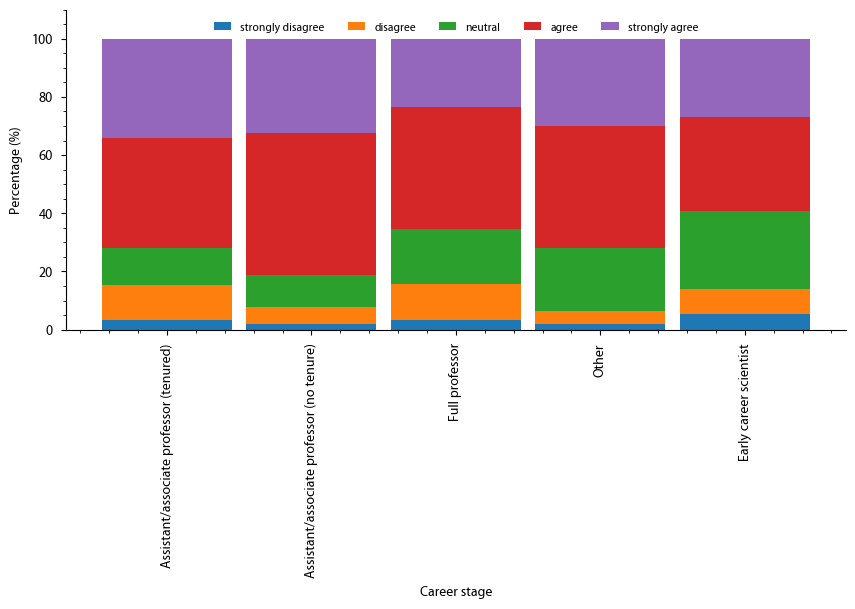

In [19]:
plt.figure()
ax = df_vals.plot.bar(stacked=True, width=0.9);
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Career stage')
ax.legend(ncol=6, loc='upper center')
ax.set_ylim(0, 110)

In [144]:
df_vals = df[['pos9', 'award_bandwagon']].value_counts().astype(float)
df_vals = df_vals.unstack('award_bandwagon') 
df_vals = df_vals.rename(columns={
    1.0: 'strongly disagree',
    2.0: 'disagree',
    3.0: 'neutral',
    4.0: 'agree',
    5.0: 'strongly agree'})

df_vals.values[:, :] /= 0.01*df_vals.values.sum(axis=1)[:, None]

df_vals.insert(5, 'agree_sum', df_vals.values[:, 3:5].sum(axis=1), True)

df_vals = df_vals.drop(columns=['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'])

df_vals = df_vals.drop(labels=['Anders', 'Student/Onderzoeksassistent/junior onderzoeker'])

df_vals_total = df[['award_bandwagon']].value_counts().astype(float)
df_vals_total.values[:] /= 0.01*df_vals_total.values.sum()

df_vals = df_vals[:]['agree_sum']

df_vals['total'] = df_vals_total.values[0:2].sum()

df_vals.to_excel("funding_consultation_final_plots_fig11.xlsx")

(0.0, 110.0)

<Figure size 1000x400 with 0 Axes>

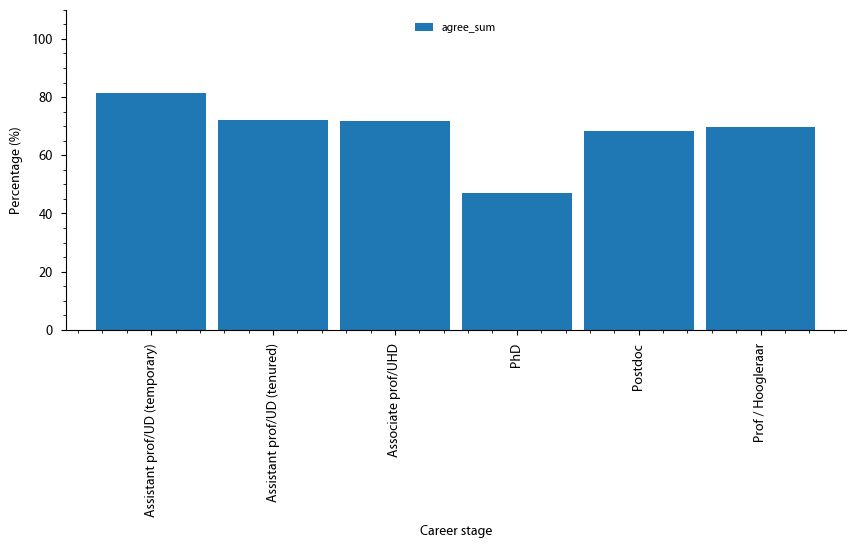

In [109]:
plt.figure()
ax = df_vals.plot.bar(stacked=True, width=0.9);
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Career stage')
ax.legend(ncol=6, loc='upper center')
ax.set_ylim(0, 110)

In [96]:
df_vals

award_bandwagon,strongly disagree,disagree,neutral,agree,strongly agree,agree_sum
pos9,,,,,,
Anders,4.761905,9.523810,19.047619,42.857143,23.809524,66.666667
Assistant prof/UD (temporary),2.083333,5.208333,11.458333,47.916667,33.333333,81.250000
Assistant prof/UD (tenured),4.782609,11.304348,11.739130,40.000000,32.173913,72.173913
Associate prof/UHD,1.219512,12.804878,14.024390,35.975610,35.975610,71.951220
PhD,6.060606,9.090909,37.878788,25.757576,21.212121,46.969697
Postdoc,5.479452,9.589041,16.438356,38.356164,30.136986,68.493151
Prof / Hoogleraar,1.935484,7.741935,20.645161,41.935484,27.741935,69.677419
Student/Onderzoeksassistent/junior onderzoeker,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_vals = df[['award_bandwagon']].value_counts().astype(float)
df_vals.values[:] /= 0.01*df_vals.values.sum()

In [39]:
df_vals

award_bandwagon
4.0                38.997821
5.0                30.283224
3.0                17.429194
2.0                 9.912854
1.0                 3.376906
dtype: float64